## Controller Design with Pole Placement

### Create ARMAX model
The ARMAX model is based on the paper "Heat Exchanger Model (Data-driven modelling)"

In [14]:
num = [0.0001701, 0.0001295];          % B
den = [1, -0.2492, -0.7469, 0, 0, 0];  % A
ts = 0.1;
sys = tf(num, den, ts)


sys =
 
     0.0001701 z + 0.0001295
  -----------------------------
  z^5 - 0.2492 z^4 - 0.7469 z^3
 
Sample time: 0.1 seconds
Discrete-time transfer function.




### Pole-Zero Cancellation
Can use this to simplify the model if there exists pole-zero cancellation

In [31]:
sys = minreal(sys, 1e-3)   % in this case, it does not


sys =
 
     0.0001701 z + 0.0001295
  -----------------------------
  z^5 - 0.2492 z^4 - 0.7469 z^3
 
Sample time: 0.1 seconds
Discrete-time transfer function.




### Check system poles, zeros, DC gain
Use function **[z, p, k] = tf2zp(num, den)** ([link](https://se.mathworks.com/help/signal/ref/tf2zp.html))

In [30]:
[z, p, k] = tf2zp(num, den)


z =

   -0.7613


p =

         0
         0
         0
    0.9978
   -0.7486


k =

   1.7010e-04




### Find Dominant Poles to Reduce System Order
From the output above, the system poles are at 0, 0, 0, 0.9978, -0.7486 <br>
The dominant poles in a discrete system are the ones that are closest to the unit circle <br>
Thus, the dominant poles are at 0.9978, -0.7486. The system can thus be reduced to 2nd-order

In [36]:
z = tf('z', ts);

sys_dominant = k*(z+0.7613)/((z-0.9978)*(z+0.7486))  % remember to include the DC gain (k)


sys_dominant =
 
  0.0001701 z + 0.0001295
  -----------------------
  z^2 - 0.2492 z - 0.747
 
Sample time: 0.1 seconds
Discrete-time transfer function.




### To proof that the reduced-order system is still a good approximate of the original system
Easy example: <br>
* step( ): for plotting system response
* stepinfo( ): retrieve information

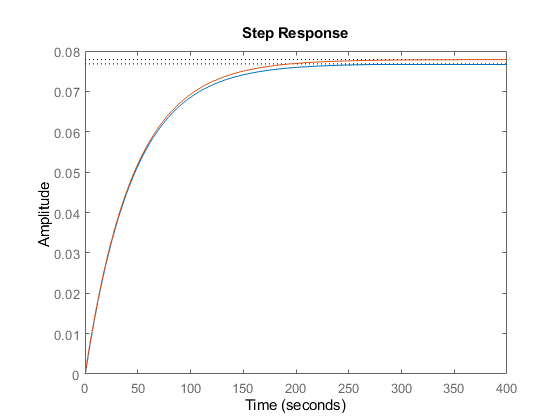

In [37]:
step(sys, sys_dominant)

From the output below it is clear that ***sys*** and ***sys_dominant*** are almost identical

In [35]:
S = stepinfo(sys)
display('--------------------------')
S = stepinfo(sys_dominant)


S = 

  struct with fields:

        RiseTime: 98.4000
    SettlingTime: 175.6000
     SettlingMin: 0.0692
     SettlingMax: 0.0767
       Overshoot: 0
      Undershoot: 0
            Peak: 0.0767
        PeakTime: 275.9000

--------------------------

S = 

  struct with fields:

        RiseTime: 99.8000
    SettlingTime: 177.7000
     SettlingMin: 0.0701
     SettlingMax: 0.0779
       Overshoot: 0
      Undershoot: 0
            Peak: 0.0779
        PeakTime: 437.9000




## Pole Placement
K = place(A, B, p)       ([link](https://se.mathworks.com/help/control/ref/place.html))

In [ ]:
p = []